# Assignment group 2: Network and exploratory data analysis

## Module B _(64 pts)_ Data Visualization and Interpretation
We have two goals for this exercise:
    
1. Summarization through measures of commonality, centrality, variation, association, and regularity.
2. Visualization through succicnt and intuitive representations that allow you to see all of the data.
    
The dataset we will be using is Philly's employees salary Dataset:

- https://www.opendataphilly.org/dataset/employee-salaries-overtime/resource/e97432a2-a6a7-466e-9025-32a1da4b14e5

also packaged in the assignment's data directory for conveniience:

```
./data/employee_salaries.csv
```

We will be using some native `pandas` and `matplotlib` to summarize and visualize the dataset. Some of the questions expect you to review the lecture notes. There are also some new methods and techniques introduced in this Module. Please feel free to be creative when answering the questions.

In [1]:
#Libraries in use:
from pprint import pprint
from collections import Counter
import re
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gender_guesser.detector as gender

### Note on hypothesis generation
We'll start looking at univariate distribution of the columns to understand what is in our dataset, and eventually use biavariate and multivariate analysis to explore existing hypotheses. However, in some instances it's the new hypotheses that arise from these visualizations that are the most insightful!

So, as you answer the questions and create visualizations, please make a note any hypotheses or conclusions you can draw from your observations. These visualization methods not only help you understand what is in your data, but also become initial insights in determining the existing relationships that exist between attributes in the data.

__B1.__ _(2 pts)_ To start, load the dataset with `pandas` into a dataframe and print its `.head()` and `tail()`. Do the lines output make sense?

In [2]:
df_salary = pd.read_csv("./data/employee_salaries.csv")

In [3]:
df_salary.head()

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross
0,1,2016,1,CHILIBERTI,ROSEMARY,ADM TECHNICIAN III,COMMON PLEAS COURT,50543.0,0.0
1,2,2016,1,SMITH,KARI,SENIOR CREW CHIEF,MANAGING DIRECTOR'S OFFICE,34842.0,0.0
2,3,2016,1,BRUMSKILL,SANDRA,SCHOOL CROSSING GUARD,POLICE DEPARTMENT,0.0,0.0
3,4,2016,1,ALEXANDER,KHADEJAH,CLERK TEMPORARY-SUMMER-$7.00/HR.,COMMON PLEAS COURT,0.0,0.0
4,5,2016,1,HILL,SEAN,PROBATION OFFICER 2,COMMON PLEAS COURT,56206.0,0.0


In [4]:
df_salary.tail()

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross
344140,436966,2018,1,HARRIS,BARRY,COURT REPORTER TRAINEE,COMMON PLEAS COURT,45202.0,0.0
344141,436967,2018,1,HARRIS,DANIELLE,COURT ADMINISTRATIVE OFFICER 1 (N.U.),COMMON PLEAS COURT,44664.0,0.0
344142,436968,2018,1,HARRIS,LORRAINE,COURT REPRESENTATIOVE 2 (UNION),COMMON PLEAS COURT,46592.0,0.0
344143,436969,2018,1,HARRIS,NICOLE,CLERK TEMPORARY-SUMMER-$7.00/HR.,COMMON PLEAS COURT,0.0,0.0
344144,436970,2018,1,HARRIS,SUSANNA,ADM TECHNICIAN IV,COMMON PLEAS COURT,63773.0,0.0


__B2.__ _(3 pts)_ Determine and print the number of years represented by the dataset, the number of unique departments, and the number of titles that exist across the dataset. 

 

In [5]:
print("Years represented are: \n")
print(df_salary['calendar_year'].unique())
print("\n")
print("Unique departments are: \n")
print(df_salary['department'].unique()[:10])
print("...")
print("\n")
print("There are "+str(len(df_salary['department'].unique()))+" unique departments.\n")
print("Unique titles are: \n")
print(df_salary['title'].unique())
print("\n")
print("There are "+str(len(df_salary['title'].unique()))+" unique titles.\n")

Years represented are: 

[2016 2017 2018]


Unique departments are: 

['COMMON PLEAS COURT' "MANAGING DIRECTOR'S OFFICE" 'POLICE DEPARTMENT'
 'HUMAN RELATIONS COMMISSION' 'RECREATION DEPARTMENT' 'WATER DEPARTMENT'
 "DISTRICT ATTORNEY'S OFFICE" 'OFFICE OF PROPERTY ASSESSMENTS'
 'PERSONNEL DEPARTMENT' 'DEPARTMENT OF PUBLIC HEALTH']
...


There are 57 unique departments.

Unique titles are: 

['ADM TECHNICIAN III' 'SENIOR CREW CHIEF' 'SCHOOL CROSSING GUARD' ...
 'FIRST DEPUTY PERSONNEL DIRECTOR' 'PERSONNEL TECHNICIAN 2'
 'LEGAL UNIT SUPERVISOR 3']


There are 1966 unique titles.



__B3.__ _(2 pts)_ For this assignment, we will restrict to five departments with some of the highest number of employees, but they should be more or less of the same scale to get started. Since the Police Department has three times as many as the other top 6 departments, we'll ignore them (the Police) for now. In particular, determine which the _top 6_ are, print out their number of employees, and store the top 2&ndash;6 in `list` called `departments`.

In [6]:
deps = []
for eachdepartment in df_salary['department'].unique():
    deps.append((len(df_salary.loc[df_salary['department'] == eachdepartment]), eachdepartment))
sorted_deps = sorted(deps, key=lambda tup: tup[0], reverse = True)
pprint(sorted_deps[:10])
print("\n")
departments = sorted_deps[1:6]
print("Departments with highest number of employees are(excluding Police!): \n")
pprint(departments)

[(89265, 'POLICE DEPARTMENT'),
 (28081, 'COMMON PLEAS COURT'),
 (28011, 'FIRE DEPARTMENT'),
 (24838, 'PHILA. PRISONS'),
 (23566, 'WATER DEPARTMENT'),
 (21269, 'RECREATION DEPARTMENT'),
 (18928, 'STREETS DEPARTMENT'),
 (16186, 'DEPARTMENT OF HUMAN SERVICES'),
 (10122, 'DEPARTMENT OF PUBLIC HEALTH'),
 (10058, 'FREE LIBRARY OF PHILA.')]


Departments with highest number of employees are(excluding Police!): 

[(28081, 'COMMON PLEAS COURT'),
 (28011, 'FIRE DEPARTMENT'),
 (24838, 'PHILA. PRISONS'),
 (23566, 'WATER DEPARTMENT'),
 (21269, 'RECREATION DEPARTMENT')]


__B4.__ _(3 pts)_ Next, restrict the data to just those rows corresponding to the departments determined in __B3__ and exhibit how the data have been restricted to just these.

[Hint. use your `departments` to create a boolean mask for the rows.]

In [7]:
selected_df_salary = df_salary[df_salary['department'].isin([x[1] for x in departments])]

In [8]:
selected_df_salary['department'].unique() #which is similar to departments

array(['COMMON PLEAS COURT', 'RECREATION DEPARTMENT', 'WATER DEPARTMENT',
       'PHILA. PRISONS', 'FIRE DEPARTMENT'], dtype=object)

__B5.__ _(5 pts)_ For our analysis, it may be interesting to have knowledge of employee gender, but these data are not a part of those distributed. So, download the `gender_guesser` module using your package manager of choice, e.g.:
```
>>> pip install gender_guesser
```
This module predicts gender based on first name&mdash;read up more about this package (see https://pypi.org/project/gender-guesser/), it can be very useful for feature engineering!

Once you've accessed the package's contents, initialize the `gender_guesser.detector.Detector()` class for case insensitivity (`case_sensitive=False`), and apply the resulting instance's `.get_gender()` method to the `'first_name'` column of the assignment data and combine the `'male'` with `'mostly male'` and `'female'` with the `'mostly female'` output in a new column called `'gender'`.

When this is all complete, print the percentage of the dataset now labeled `'male'` and `'female'`.

In [9]:
d = gender.Detector(case_sensitive=False)

In [10]:
selected_df_salary['Gender'] =  selected_df_salary['first_name'].apply(lambda x: d.get_gender(x))

/Users/Kianamon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
selected_df_salary.head()

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,Gender
0,1,2016,1,CHILIBERTI,ROSEMARY,ADM TECHNICIAN III,COMMON PLEAS COURT,50543.0,0.0,female
3,4,2016,1,ALEXANDER,KHADEJAH,CLERK TEMPORARY-SUMMER-$7.00/HR.,COMMON PLEAS COURT,0.0,0.0,unknown
4,5,2016,1,HILL,SEAN,PROBATION OFFICER 2,COMMON PLEAS COURT,56206.0,0.0,male
6,7,2016,1,SETTLES,LINDA,SENIOR COURT REPORTER,COMMON PLEAS COURT,66469.0,0.0,female
8,9,2016,1,BALL,JAMES,RECREATION LEADER 2,RECREATION DEPARTMENT,58126.0,0.0,male


In [12]:
print(selected_df_salary['Gender'].unique()) #andy?? :)) (androgynous?)

['female' 'unknown' 'male' 'mostly_female' 'mostly_male' 'andy']


In [13]:
selected_df_salary.loc[selected_df_salary['Gender'] == 'mostly_male', 'Gender'] = 'male'
selected_df_salary.loc[selected_df_salary['Gender'] == 'mostly_female', 'Gender'] = 'female'

/Users/Kianamon/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
print(selected_df_salary['Gender'].unique())

['female' 'unknown' 'male' 'andy']


In [15]:
number_of_employees = selected_df_salary.shape[0]
number_of_males = len(selected_df_salary.loc[selected_df_salary['Gender'] == 'male'])
number_of_females = len(selected_df_salary.loc[selected_df_salary['Gender'] == 'female'])

In [16]:
malepercentage = 100*number_of_males/number_of_employees
femalepercentage = 100*number_of_females/number_of_employees
print(str(malepercentage)+" percent of the employees are male and "+
      str(femalepercentage)+" percent of them are female and the gender of the rest is unknown.\n")

58.63077962867252 percent of the employees are male and 28.93809883512901 percent of them are female and the gender of the rest is unknown.



__B6.__ _(2 pts)_ Here, your job is to calculate the distribution of quarters, i.e., the percentge of the remaining data that fall into the four different values held by the `quarter` column. You should be able to answer if each value actually makes up a 'quarter' of the data?

\[Hint. You can take a quick look at the distribution by using `.value_counts()` method. This could also be helpful for part __B4__!\]

In [17]:
print(selected_df_salary['quarter'].value_counts())

3    36124
2    34314
1    32987
4    22340
Name: quarter, dtype: int64


Text(0.5,1,'Distribution of quarters')

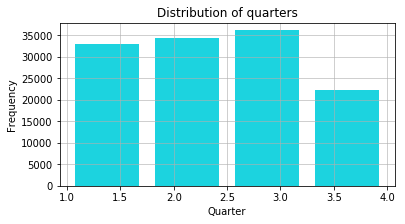

In [22]:
secondhist = plt.figure(figsize=(6,3))
n, bins, patches = plt.hist(x=selected_df_salary['quarter'], bins=4, color='#1CD3DF', 
                            alpha=1, rwidth=0.8)
plt.grid(alpha=0.75)
plt.xlabel('Quarter')
plt.ylabel('Frequency')
plt.title('Distribution of quarters')

__B7.__ _(7 pts)_ Now, write a function called `barplot(df, column, title, top = 5)`, designed to take a `column` name from the dataframe `df` corresponding to a _categorical_ variable, like `'department'`. This function should create a bar plot for the specified `column`. Make sure your graphs have the proper axis labels and `title` considering of the specified `column`.

__Important.__ The `top` argument specifies the number of `top` ocurring categories to display on the bar plot. This makes it possible to select how much of the distribution to observe!

When this is complete, exhibit your functions output on the various categorical columns in the dataset, but don't try and apply it to a numeric column!

\[Hint. Use the dataframe `.value_counts()` and `.head()` methods for convenience!\]

In [23]:
def barplot(df, column, title, top):
    #filter df for top argument
    cats = []
    for eachcategory in df[column].unique():
        cats.append((len(df.loc[df[column] == eachcategory]), eachcategory))
    sorted_cats = sorted(cats, key=lambda tup: tup[0], reverse = True)
    sortedcatstops = sorted_cats[:top]
    
    filtered_df = df[df[column].isin([x[1] for x in sortedcatstops])]
    
    ## initialize a counter for the departments
    categories = Counter()

    ## loop over rows to count up the positions
    for ix, row in filtered_df.iterrows():
        categories[row[column]] += 1
    ## It's width by height, so let's make this one wide!
    bar_fig = plt.figure(figsize = (10, 5))

    _  = plt.bar(
        x = range(1, len(categories) + 1),
        height = list(categories.values()),
        tick_label = list(categories.keys()), 
        color='#1CD3DF', alpha=1, width=0.5)
    _ = plt.grid(alpha=0.75)

    ## Set the tick and label fontsize
    plt.tick_params(labelsize = 9)

    ## Set the title
    _ = plt.title("Title of Employees: "+title, fontsize = 9)

    ## Set the y-label
    _ = plt.ylabel("Number of Employees", fontsize = 9)
    _ = plt.xticks(rotation=60)

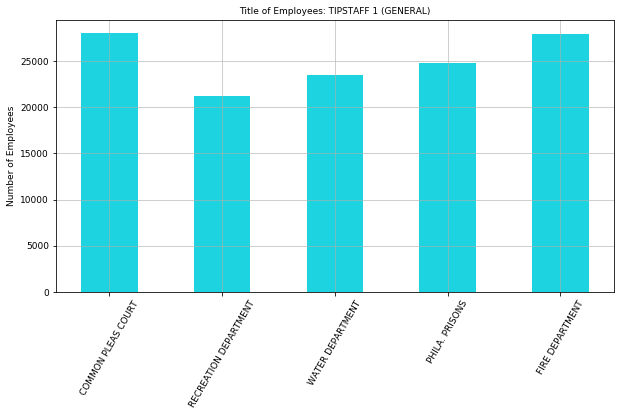

In [24]:
barplot(selected_df_salary, 'department', "TIPSTAFF 1 (GENERAL)", top = 5)

__B8.__ _(5 pts)_ Here, we'll do the same thing but now for histograms and the numeric columns. In particular, write a function called `histogram(df, column, title)`, designed to take a `column` name from the dataframe `df` corresponding to a _numeric_ variable, like `'annual_salary'`. This function should create a histogram for the specified `column`. Make sure your graphs have the proper axis labels and `title` considering of the specified `column`.

When this is complete, exhibit your functions output on the various numeric columns in the dataset, but don't try and apply it to a categorical column!

In [25]:
def histogram(df, column, title):
    plt.figure(figsize = (10, 10))
    n, bins, patches = plt.hist(x=df[column], bins = "auto", color ='#1CD3DF', 
                            alpha=1, rwidth=0.9)
    plt.grid(alpha=0.75)
    plt.title('Histogram of '+column+" among employees of the title: "+ title)
    plt.xlabel(column+" range")
    plt.ylabel("Frequency")
    plt.xticks(rotation=60)

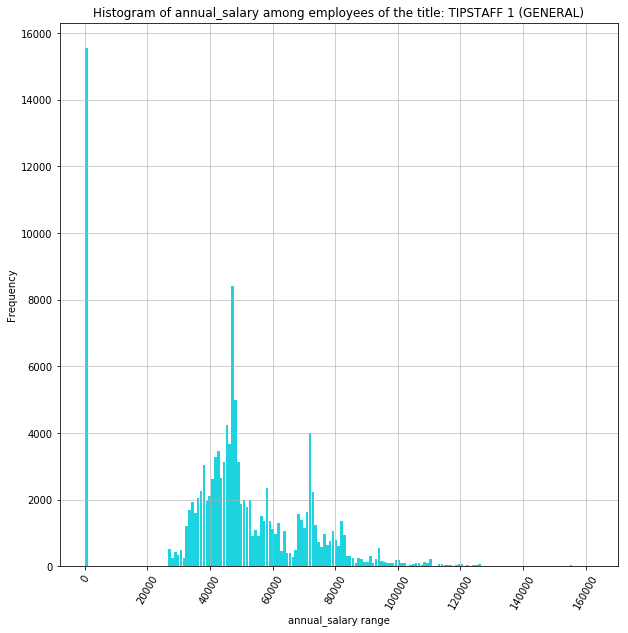

In [26]:
histogram(selected_df_salary, 'annual_salary', "TIPSTAFF 1 (GENERAL)")

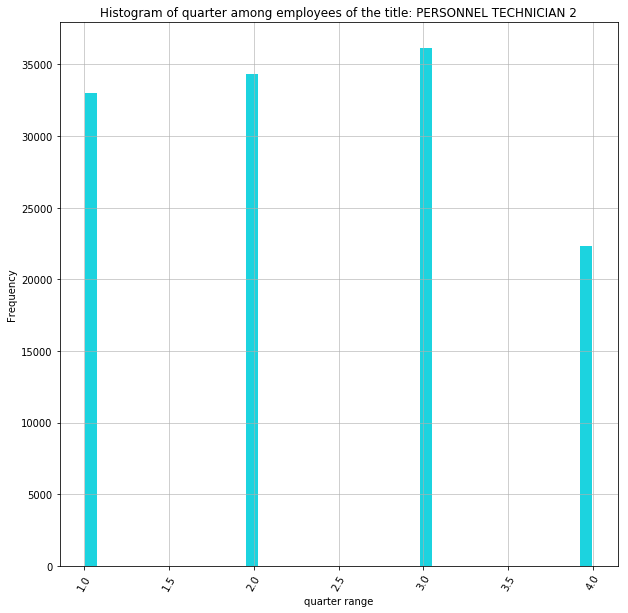

In [27]:
histogram(selected_df_salary, 'quarter', "PERSONNEL TECHNICIAN 2")

__B9.__ _(2 pts)_ Next up, let's investigate the annual salaries column. Specifically, let's look at a boxplot of this column using `matplotlib.pyplot.plot.boxplot`, as in the Chapter 3 notes. When you apply this function to the salary column describe what you see for outliers in the response box below.

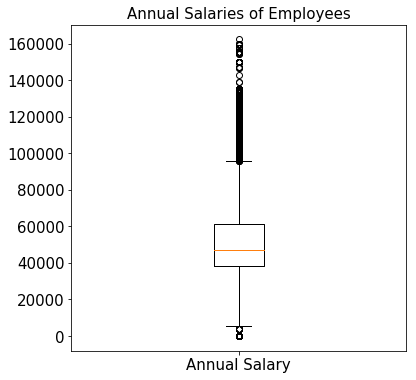

In [28]:
## Initialize a 6 x 6in figure
fig = plt.figure(figsize = (6, 6))

## Make the box plot
_ = plt.boxplot(
    selected_df_salary["annual_salary"], 
    labels = ["Annual Salary"]
)

## adjust the tick and label font size
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Annual Salaries of Employees", fontsize = 15)

<font color=blue>Outliers are placed for salaries more than 96k per year and less than 5k a year.</font>

__B10.__ _(3 pts)_ Now that we can see the outliers, use the `np.percentile()` function and boolean masks to identify which employees have _high_ outlier salaries. Supposing $IQR$ refers to the size of the interquartile range of this column, utilize the boxplot visualization's criterion for 'outlier':

- Outlier: a point that falls $1.5$ times an $IQR$ distance _above_ the 3rd quartile.

When this is complete, use this boolean mask on our dataframe to print the `.head()` of our outlier employees and see what they do and earn.

In [29]:
IQR = np.percentile(selected_df_salary["annual_salary"], [25, 75])

In [30]:
outlier_lower_limit = IQR[1]+ 1.5*(IQR[1]-IQR[0])
print(outlier_lower_limit)

95913.5


In [31]:
outlier_salary_employees_df = selected_df_salary[selected_df_salary["annual_salary"] >= outlier_lower_limit]
outlier_salary_employees_df.head()

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,Gender
125,183,2016,1,BOZZACCO,GLENN,CHIEF COMPLIANCE OFFICER,COMMON PLEAS COURT,116860.0,0.0,male
140,198,2016,1,LASTER,JEREMIAH,DEPUTY COMMISSIONER,FIRE DEPARTMENT,132911.0,0.0,male
241,128,2016,1,BESSLER,BARRY,PARK PUBLIC RELATIONA & RECREATION DIR,RECREATION DEPARTMENT,97298.0,0.0,male
287,174,2016,1,UNGER,ROSEANNE,CHIEF 1,COMMON PLEAS COURT,104575.0,0.0,female
295,529,2016,1,TOUCHSTONE,MICHAEL,FIRE PARAMEDIC SERVICES CHIEF,FIRE DEPARTMENT,106654.0,0.0,male


In [32]:
outlier_salary_employees_df.shape #number of employees with outlier salaries

(2389, 10)

__B11.__ (5 pts) Now that we've got a sense of the outliers, let's see if we can up our visualization game. Both the boxplot and histogram provide different information on the structure of the distribution of salaries. It would be great if we could compare these! However, the best comparison will occur if the box is rotated and placed below the histogram so that the location of box, whiskers, etc. falls along (parallel to) the x-axis of the histogram.

In particular, use the `ax = fig.add_subplot(num_rows, num_cols, panel_number)` method on a figure object (the output of `plt.figure()`) to create different axes for the boxplot and histogram, taking care to label axes as needed. Don't forget that your boxplot should be displayed sideways and appear below the histogram!

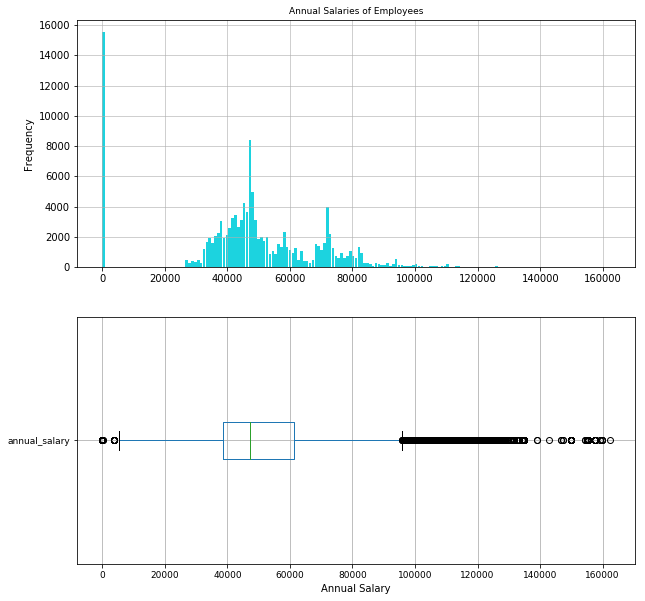

In [33]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(2, 1, 1)
plt.hist(x=selected_df_salary['annual_salary'], bins = "auto", color ='#1CD3DF', 
                            alpha=1, rwidth=0.9)
plt.title("Annual Salaries of Employees", fontsize = 9)
plt.grid(alpha=0.75)
plt.ylabel("Frequency")
#plt.xticks(rotation=60)
ax = fig.add_subplot(2, 1, 2)
selected_df_salary.boxplot(column = 'annual_salary', vert=False)
## adjust the tick and label font size
plt.tick_params(labelsize = 9)
plt.xlabel('Annual Salary')
## Set the title
plt.show()

__B12.__ _(5 pts)_ Notice that while we know how much the employees earned in gross overtime, it's not entirely clear which individuals have actually _worked_ the most overtime hours. According to [a government guideline](https://www.opm.gov/policy-data-oversight/pay-leave/pay-administration/fact-sheets/computing-hourly-rates-of-pay-using-the-2087-hour-divisor/):

> Hourly rates of basic pay are computed by dividing an employee's annual rate of basic pay by 2087 hours.

So, using the assumption that overtime hours are payed out at $1.5$ times an employee's annual salary, compute the number of overtime hours worked by each employee in the dataset and store this in the dataframe under a new column called `'ytd_overtime_gross_hours'`. Be sure to handle remove any NAs or Infs from the result!

When this is complete, print the `.head(25)` of your resulting dataframe, sorted by this new column in descending order. In the response box below answer the following questions:

- Do you think is calculation is generally correct?
- What issues could occur with this overtime hours calculation?
- Do you think all employees are 'full time'?

\[Hint. Assuming these individuals _do_ work full time hours, how many overtime hours _could_ an individual _actually_ work in a year?\] 

<font color=blue>Probably we are mistakenly calulating the basic pay rate because not everyone is working 2087 hours per year. This is obvious from the first row of the sorted dataset below. So, I think not everyone is working full time. The yearly salary for the first row is around 3k which is very low for 2087 hours of work which will mislead the calculations of the overtime hours as if the person works 5000 hours overtime which is obviously incorrect!</font>

In [34]:
basic_pay_rate = selected_df_salary['annual_salary']/2087
overtime_pay_rate = 1.5*basic_pay_rate
selected_df_salary['ytd_overtime_gross_hours'] = selected_df_salary['ytd_overtime_gross']/overtime_pay_rate
df_salary_filledNA = selected_df_salary.replace([np.inf, -np.inf], np.nan).dropna(subset=["ytd_overtime_gross_hours"], how="all")

/Users/Kianamon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
sorted_overtime_hours = df_salary_filledNA.sort_values(by=['ytd_overtime_gross_hours'], ascending=False)

In [36]:
sorted_overtime_hours.head(25)

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,Gender,ytd_overtime_gross_hours
256043,398122,2017,4,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3715.0,15373.20,male,5757.535828
202438,208323,2017,3,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3715.0,13442.91,male,5034.608016
330139,366856,2018,3,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3808.0,8884.70,male,3246.213043
277171,334402,2018,2,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3715.0,8438.10,male,3160.217981
242361,395664,2017,4,NEAL,SHARON,CORRECTIONAL OFFICER,PHILA. PRISONS,47196.0,97221.21,female,2866.071493
113170,114390,2016,4,GREEN,MARK,SEWER MAINTENANCE INSPECTOR,WATER DEPARTMENT,3607.0,7222.53,male,2785.956956
113697,111990,2016,4,NEAL,SHARON,CORRECTIONAL OFFICER,PHILA. PRISONS,47196.0,92005.08,female,2712.300505
324361,364546,2018,3,POTHEN,KENNY,CORRECTIONAL OFFICER,PHILA. PRISONS,7459.0,13522.89,male,2522.435664
245009,394503,2017,4,BYNUM,DONOVAN,CORRECTIONAL OFFICER,PHILA. PRISONS,47196.0,83196.27,male,2452.617672
242768,394804,2017,4,FELIX,BRUCE,CORRECTIONAL OFFICER,PHILA. PRISONS,47310.0,82181.65,male,2416.868929


__B13.__ _(5 pts)_ Our overall interest may be to understand the `'annual_salaries'` column, and one avenue towards understanding this variable is through exploration of relationships with the others. So here's one question we might ask:
        
- Do employees who work overtime have higher salaries? If so how much?

To approach this question, compute and print the correlation between these columns and display a scatter plot. Be sure to accomadate for density in the picture as you interpret. Again, label the axes clearly and provide a title for to support readers. 

When this is complete, discuss any relationship that you see (or don't) between the columns in the response box below.

<font color=blue>The most correlated column to the annual salary is the title which is predictable. overtime earnings are correlated to annual salary but it does not mean that the employees who work overtime necessarily have higher salaries but they earn more money compared to people with same basic salaries.(obviously!)</font>

In [37]:
corr = sorted_overtime_hours.apply(lambda x: x.factorize()[0]).corr()
corr

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,Gender,ytd_overtime_gross_hours
objectid,1.000000,-0.087362,0.197340,0.522851,0.316525,0.710443,0.487893,0.651840,0.932461,0.121989,0.938783
calendar_year,-0.087362,1.000000,0.001040,0.002897,-0.003800,-0.003712,-0.002257,0.073101,-0.019701,-0.003743,-0.019755
quarter,0.197340,0.001040,1.000000,0.002283,-0.000385,-0.001793,-0.000871,0.050901,0.254253,-0.001688,0.249335
last_name,0.522851,0.002897,0.002283,1.000000,0.177517,0.481704,0.299291,0.436642,0.502784,0.018649,0.507305
first_name,0.316525,-0.003800,-0.000385,0.177517,1.000000,0.315784,0.161837,0.271369,0.301282,0.564774,0.303938
title,0.710443,-0.003712,-0.001793,0.481704,0.315784,1.000000,0.577969,0.796633,0.617970,0.171163,0.629203
department,0.487893,-0.002257,-0.000871,0.299291,0.161837,0.577969,1.000000,0.468487,0.413988,0.087509,0.422998
annual_salary,0.651840,0.073101,0.050901,0.436642,0.271369,0.796633,0.468487,1.000000,0.579014,0.125771,0.588331
ytd_overtime_gross,0.932461,-0.019701,0.254253,0.502784,0.301282,0.617970,0.413988,0.579014,1.000000,0.097128,0.999241
Gender,0.121989,-0.003743,-0.001688,0.018649,0.564774,0.171163,0.087509,0.125771,0.097128,1.000000,0.099537


In [38]:
list(corr.columns)

['objectid',
 'calendar_year',
 'quarter',
 'last_name',
 'first_name',
 'title',
 'department',
 'annual_salary',
 'ytd_overtime_gross',
 'Gender',
 'ytd_overtime_gross_hours']

In [39]:
#scatter plot:
def scatter_corr(df, corr, cols):
    # plot correlated values
    plt.rcParams['figure.figsize'] = [20, 6]

    fig, ax = plt.subplots(nrows=1, ncols=2)

    ax=ax.flatten()
    colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
            '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080']
    j=0

    for i in ax:
        if j==0:
            i.set_ylabel('annual_salary')
        i.scatter(df[cols[j]], df['annual_salary'],  alpha=0.1, color=colors[j])
        i.set_xlabel(cols[j])
        
        i.set_title('Correlation is: %s'%corr.loc[cols[j]]['annual_salary'].round(2))
        j+=1
    
    plt.show()

In [40]:
cols_to_plot = ['ytd_overtime_gross', 'ytd_overtime_gross_hours']

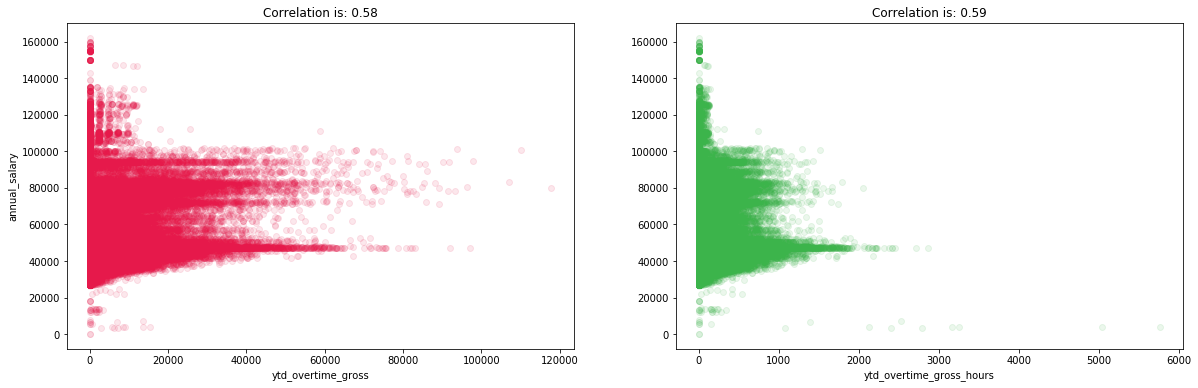

In [41]:
scatter_corr(sorted_overtime_hours.dropna(), corr, cols_to_plot)

**This is another nice way to display correlations:**

In [42]:
def plot_corr(df, corr, size):
    from matplotlib import cm as cm
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    fig, ax = plt.subplots(figsize=(size, size))
    #cmap = cm.get_cmap('jet', 20)
    cax = ax.imshow(corr, interpolation="nearest")
    ax.grid(True)
    #plt.title('Salary Feature Correlation')
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    fig.colorbar(cax, ticks=[0, .25, .5, .75, 1])
    plt.xticks(rotation=90)

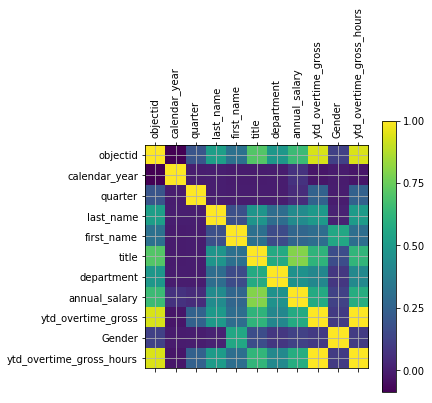

In [43]:
plot_corr(sorted_overtime_hours, corr, size = 5)

__B14.__ _(5 pts)_ Now let's explore another hypothesis&mdash;that gender affects to pay. It will be good to  compare similarly-sized groups, so first group the rows by both `'gender'` and `'title'` to observe the gender ratios. 

In particular, use the `.groupby(column_list)` method to create generator of grouped rows. Using the `column_list = ['gender', 'title']` argument will allow extraction of two groups (one for each gender) with a matching `'title'`. Chose one of the top 10 `'title'`s (by greatest number of employees), but make sure there is a _reasonable balance_ of males and females for the profession you choose. Store these two resulting groups from as the `males` and `females` dataframes, print the `.head()` of each. In the response box below state the `'title'` that you chose.

In [44]:
#I am saving the cleaned data to work with(no missing values)
cleaned_data = sorted_overtime_hours.dropna()

In [45]:
column_list = ['Gender', 'title']

In [46]:
#first I figure out which titles have the most employees:
titles = []
for eachtitle in cleaned_data['title'].unique():
    titles.append((len(cleaned_data.loc[cleaned_data['title'] == eachtitle]), eachtitle))
sorted_titles = sorted(titles, key=lambda tup: tup[0], reverse = True)
pprint(sorted_titles[:10])

[(18830, 'CORRECTIONAL OFFICER'),
 (16429, 'FIREFIGHTER'),
 (3297, 'FIRE LIEUTENANT'),
 (2884, 'PROBATION OFFICER 2'),
 (2455, 'FIRE SERV PARAMEDIC'),
 (2264, 'LEGAL CLERK 1'),
 (1881, 'EMERGENCY MEDICAL TECHNICIAN'),
 (1632, 'CORRECTIONAL SERGEANT'),
 (1123, 'FIRE CAPTAIN'),
 (1116, 'SEMI-SKILLED LABORER')]


<font color=blue>I will make the dataframes for the title `"EMERGENCY MEDICAL TECHNICIAN"` since it has a reasonable ratio of male and female employees.</font> 

In [47]:
Selected_title = 'EMERGENCY MEDICAL TECHNICIAN'

In [48]:
grouped_data = cleaned_data.groupby(column_list)

In [49]:
female = grouped_data.get_group(('female', Selected_title))

In [50]:
male = grouped_data.get_group(('male', Selected_title))

In [51]:
female.head()

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,Gender,ytd_overtime_gross_hours
101081,104555,2016,4,HASAN,NUR,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,48103.0,42503.20,female,1229.364467
71842,73024,2016,3,HASAN,NUR,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,44093.0,37991.35,female,1198.798713
103841,104159,2016,4,DIGGINS,LAURA,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,44093.0,34058.41,female,1074.696689
106342,105901,2016,4,VALEUS,NAOMI,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,48103.0,34100.90,female,986.335964
229669,389407,2017,4,VALEUS,NAOMI,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,51537.0,36235.32,female,978.237161


In [52]:
male.head()

,objectid,calendar_year,quarter,last_name,first_name,title,department,annual_salary,ytd_overtime_gross,Gender,ytd_overtime_gross_hours
319772,357395,2018,3,THOMAS,RICHARD,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,56891.0,61546.97,male,1505.200312
100538,104393,2016,4,GARRISON,RASHEED,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,48103.0,50251.91,male,1453.488503
318423,355930,2018,3,GARRISON,RASHEED,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,56891.0,57205.72,male,1399.030165
106104,105837,2016,4,THOMAS,RICHARD,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,48103.0,47324.35,male,1368.811626
105814,104693,2016,4,JEAN-PIERRE,RALPH,EMERGENCY MEDICAL TECHNICIAN,FIRE DEPARTMENT,44093.0,42723.75,male,1348.127310


__B15.__ (2 pts) determine if there is a difference between your male and female salaries on average and discuss the severity of this difference in the response box.

<font color=blue>On average both groups' salaries are very close. Women earn slightly more.(interesting!).</font>

In [53]:
female_average = female["annual_salary"].mean()
male_average = male["annual_salary"].mean()
print(
    "Annual salary for women on average is "+str(
        female_average)+" and average annual salary for men is "+str(male_average))

Annual salary for women on average is 48448.636559139784 and average annual salary for men is 48068.57688723206


__B16.__ (3 pts) That's a lot of work still to compare two means, and there's a lot of different titles to compare. Grouping `'gender'` against a single other `'title'` is just a comparison of `'gender'` against a single `'title'` category, as opposed to the generalization of comparing `'gender'` across _all_ of the categories in the `'title'` column for the `'annual_salary'` value. It turns out, `pandas` has some very convenient utility for this with the `pd.crosstab()` function:

- ```pd.crosstab(x, y,  values=z, aggfunc = ['mean', 'std', 'count'])```

Here, `x` and `y` will be our two categorical columns to compare, while `z` will be the the numeric column along whose values we wish to observe effects (of the categories). 

Your job is to now apply the `pd.crosstab()` function to the `'title'` and `'gender'` columns (`x` and `y`) with `'annual_salary'` for `values`. The `aggfunc` argument specifies a list of metrics to apply as summary for the columns. For in this assignment, we're just going to use the mean and standard deviation and count (number of rows in the group).

After you run the `pd.crosstab()` function store the resulting dataframe as `avg_salary_gender_v_title`, and prinit/interpret the `.head(25)` in the response box below. Do you see an `'title'`s that you think are worth investigating?

<font color=blue>First, we have a lot of titles with missing average which means that the balance between male and female employees is not very well. This aside, for example for ADMIN SPECIALIST 2 NON-CONFIDENTIAL female employees are paid more compared to males and on the other hand, for the title ACCOUNTING SUPERVISOR, males are paid 10k more than females per year.</font>

In [54]:
avg_salary_gender_v_title = pd.crosstab(
    cleaned_data['title'], cleaned_data['Gender'],  
    values = cleaned_data['annual_salary'], aggfunc = ['mean', 'std', 'count'])

In [55]:
avg_salary_gender_v_title.head(25)

mean                \
Gender                                        andy        female   
title                                                              
ACCOUNT CLERK                                  NaN  37066.805755   
ACCOUNTANT                                     NaN  50256.363636   
ACCOUNTING MANAGER                             NaN           NaN   
ACCOUNTING SUPERVISOR                          NaN  57835.000000   
ACCOUNTING SUPVR                               NaN           NaN   
ACCOUNTING TECHNICIAN 1                    35504.0  37229.843750   
ACCOUNTING TECHNICIAN 2                        NaN  42811.022727   
ACCOUNTING TECHNICIAN 2 TF                     NaN  43749.250000   
ACCOUNTING TECHNICIAN III                      NaN  46517.642857   
ACCOUNTING TRANSACTIONS SUPERVISOR             NaN  73824.000000   
ACCTANT/REV EXAMINER/CONTRACT AUDIT TRAIN      NaN  39352.000000   
ACTING COMMISSIONER/PRISONS                    NaN           NaN   
ADM SECRETARY I                                NaN  41014.890909   
ADM SECRETARY II                               NaN  47578.378378   
ADM TECHNICIAN I                               NaN  37545.179245   
ADM TECHNICIAN II                              NaN  43004.388489   
ADM TECHNICIAN III                             NaN  49374.350000   
ADM TECHNICIAN IV                              NaN  63379.415094   
ADMIN ASST NON-CONFIDENTIAL                    NaN  47972.700000   
ADMIN SPECIALIST 1 - NON-CONFIDENTIAL          NaN  46839.818182   
ADMIN SPECIALIST 2 NON-CONFIDENTIAL            NaN  60590.764706   
ADMIN SPECIALIST SUPERVISORY-NON CONFIDEN      NaN           NaN   
ADMIN SRVCS SUPERVISOR - CONFIDENTIAL          NaN  49492.388889   
ADMIN SRVS SUPERVISOR NON-CONFIDENTIAL         NaN  49506.563636   
ADMINISTRATIVE ASSISTANT - CONFIDENTIAL        NaN  50585.155556   

                                                                        std  \
Gender                                              male       unknown andy   
title                                                                         
ACCOUNT CLERK                               37932.625000  36714.596154  NaN   
ACCOUNTANT                                  54909.823529  59120.166667  NaN   
ACCOUNTING MANAGER                          87309.090909           NaN  NaN   
ACCOUNTING SUPERVISOR                       67015.200000           NaN  NaN   
ACCOUNTING SUPVR                            67324.571429  66953.142857  NaN   
ACCOUNTING TECHNICIAN 1                     36546.852941  37184.333333  NaN   
ACCOUNTING TECHNICIAN 2                     41364.000000           NaN  NaN   
ACCOUNTING TECHNICIAN 2 TF                  43465.545455           NaN  NaN   
ACCOUNTING TECHNICIAN III                            NaN           NaN  NaN   
ACCOUNTING TRANSACTIONS SUPERVISOR                   NaN           NaN  NaN   
ACCTANT/REV EXAMINER/CONTRACT AUDIT TRAIN   39840.333333  43718.750000  NaN   
ACTING COMMISSIONER/PRISONS                155000.000000           NaN  NaN   
ADM SECRETARY I                                      NaN           NaN  NaN   
ADM SECRETARY II                            46731.000000  47749.666667  NaN   
ADM TECHNICIAN I                            36002.043478  35943.894737  NaN   
ADM TECHNICIAN II                           41145.111111  43414.714286  NaN   
ADM TECHNICIAN III                          49876.285714           NaN  NaN   
ADM TECHNICIAN IV                                    NaN           NaN  NaN   
ADMIN ASST NON-CONFIDENTIAL                 49715.636364  49344.500000  NaN   
ADMIN SPECIALIST 1 - NON-CONFIDENTIAL       44067.833333           NaN  NaN   
ADMIN SPECIALIST 2 NON-CONFIDENTIAL         53467.200000  60612.909091  NaN   
ADMIN SPECIALIST SUPERVISORY-NON CONFIDEN            NaN  64477.090909  NaN   
ADMIN SRVCS SUPERVISOR - CONFIDENTIAL                NaN           NaN  NaN   
ADMIN SRVS SUPERVISOR NON-CONFIDENTIAL      50605.090909           NaN  NaN   
ADMINIST

__B17.__ (3 pts) Finally, your job here is to explore the of the 25 `'title'`s with largest difference in average pay between genders using `avg_salary_gender_v_title` dataframe.

To start, drop any rows/`'title'`s for which there are NAs. Then, compute an additional columns called `'absolute_difference'`, containinig the absolute value of the differences between the male and female columns. Next, `.sort(ascending = False)` the modified `avg_salary_gender_v_title` dataframe by the new `'absolute_difference'` column and store the resultinig `.head(25)` as `top_25` and print the result.

When this is done, discuss in the response box below an observations about these most widely varying salaries averages? Does the standard deviation help to glean any other information?

<font color=blue>Most of the titles that has a big difference between male and female has a wider range of salaries which makes it hard to extarct the reason behind this difference, since the average salary for different people with same gender can be very different. In this case we can say that the standard deviation is higher.</font>

In [56]:
avg_sal_g_vs_t_clean = avg_salary_gender_v_title['mean'][['female', 'male']].dropna()

In [57]:
avg_sal_g_vs_t_clean.head()

Gender,female,male
title,,
ACCOUNT CLERK,37066.805755,37932.625000
ACCOUNTANT,50256.363636,54909.823529
ACCOUNTING SUPERVISOR,57835.000000,67015.200000
ACCOUNTING TECHNICIAN 1,37229.843750,36546.852941
ACCOUNTING TECHNICIAN 2,42811.022727,41364.000000


In [58]:
avg_sal_g_vs_t_clean['absolute_difference'] = abs(avg_sal_g_vs_t_clean['female'] - avg_sal_g_vs_t_clean['male'])

In [59]:
sorted_diff = avg_sal_g_vs_t_clean.sort_values(by=['absolute_difference'], ascending=False)

In [60]:
top_25 = sorted_diff.head(25)

In [61]:
top_25

Gender,female,male,absolute_difference
title,,,
"LABOR,PROCUREMENT & LITIGATION ATTORNEY",74100.000000,116860.000000,42760.000000
SENIOR ACCOUNTANT,75152.318182,54983.000000,20169.318182
PARKS OPERATIONS DIRECTOR,95136.818182,108890.363636,13753.545455
CHIEF FIRE EQUIPMENT DISPATCHER,56176.363636,66566.000000,10389.636364
PARKS & RECREATION OPERATIONS MANAGER,82024.846154,72203.300000,9821.546154
ADMINISTRATIVE TRAINEE 2,44875.000000,35099.000000,9776.000000
ACCOUNTING SUPERVISOR,57835.000000,67015.200000,9180.200000
ADMINISTRATIVE SCIENTIST,90367.000000,99378.878788,9011.878788
ARCHITECTURAL PROJECT COORD 1,43417.500000,52130.666667,8713.166667


__B18.__ _(2 pts)_ Finally, take your `top_25` largest-difference `'title'`s and display them using a side-by-side barplot. To conveniently do this, we can use the `.plot(kind = 'bar')` on our `['mean']` column in the `top_25` data frame. 

Use the dataframe `.plot()` method, since this `pandas` method for a barplot is really just wrapping `matplotlib`'s `pyplot`. This means we can use `pyplot`/`matpltlib` (proper) commands for many things like the `plt.title()`, but to make the figure size nice we have the pass the `figsize=(x_inches,y_inches)` argument to the dataframe `.plot()` method. So, as is necessary make this visualization look nice to ease your discussion (above)!

In [62]:
top_25['titles'] = top_25.index

/Users/Kianamon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
top_25.head()

Gender,female,male,absolute_difference,titles
title,,,,
"LABOR,PROCUREMENT & LITIGATION ATTORNEY",74100.000000,116860.000000,42760.000000,"LABOR,PROCUREMENT & LITIGATION ATTORNEY"
SENIOR ACCOUNTANT,75152.318182,54983.000000,20169.318182,SENIOR ACCOUNTANT
PARKS OPERATIONS DIRECTOR,95136.818182,108890.363636,13753.545455,PARKS OPERATIONS DIRECTOR
CHIEF FIRE EQUIPMENT DISPATCHER,56176.363636,66566.000000,10389.636364,CHIEF FIRE EQUIPMENT DISPATCHER
PARKS & RECREATION OPERATIONS MANAGER,82024.846154,72203.300000,9821.546154,PARKS & RECREATION OPERATIONS MANAGER


Text(0,0.5,'Average Annual Salary')

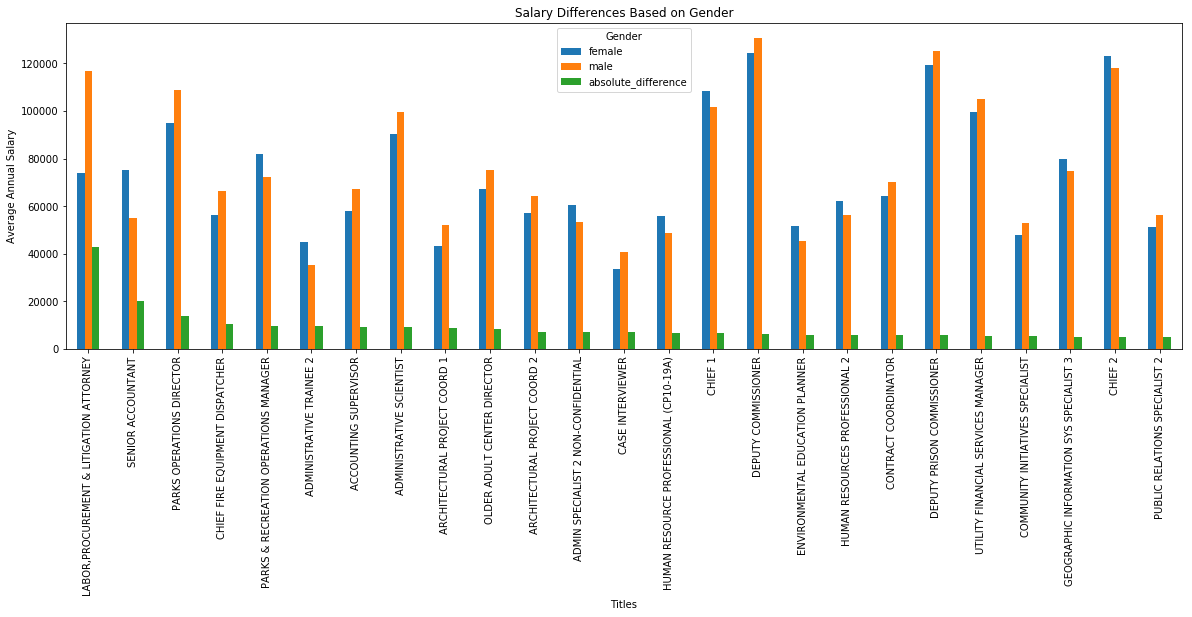

In [64]:
top_25.plot(x='titles', y=["female", "male", "absolute_difference"], kind="bar")
plt.title('Salary Differences Based on Gender')
plt.xlabel('Titles')
plt.ylabel('Average Annual Salary')